In [11]:
import scipy.io as scio
import h5py
import numpy as np
import tifffile as tf
from PIL import Image
import hdf5storage

import pandas as pd
import numpy as np
import math
import random
import copy
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import seaborn as sns
import networkx as nx
from networkx.algorithms import community
import powerlaw

from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.signal import find_peaks, correlate2d
from scipy import stats
from scipy import signal

import cv2 as cv
import os
import time

from sklearn.preprocessing import minmax_scale
# from oasis.functions import deconvolve
from scipy.interpolate import make_interp_spline, BSpline
import colorsys
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.patches import Ellipse, Circle
from sklearn.manifold import TSNE
from scipy.stats import mannwhitneyu

res_path = 'F:/THU/anesthesia_light/data_4groups/m009_2/data_analysis_res_m009iso2/'
load_path = 'F:/THU/anesthesia_light/data_4groups/m009_2/'

print("res_path:", res_path)
print("load_path:", load_path)

res_path: F:/THU/anesthesia_light/data_4groups/m009_2/data_analysis_res_m009iso2/
load_path: F:/THU/anesthesia_light/data_4groups/m009_2/


In [12]:
bs_start_idx = [1935, 1953, 1992, 2009, 2023, 2044, 2053, 2105, 2154, 2181, 2209, 2248, 2301, 2345, 2397, 2434, 2444, 2482, 2533, 2581, 2632, 2693, 2708]
bs_end_idx = [1946, 1965, 2005, 2019, 2039, 2050, 2076, 2124, 2177, 2191, 2229, 2268, 2324, 2367, 2412, 2438, 2453, 2503, 2550, 2593, 2646, 2699, 2714]
ane_start_idx = [1946, 1965, 2005, 2019, 2039, 2050, 2076, 2124, 2177, 2191, 2229, 2268, 2324, 2367, 2412, 2438, 2453, 2503, 2550, 2593, 2646, 2699, 2714]
ane_end_idx = [1953, 1992, 2009, 2023, 2044, 2053, 2105, 2154, 2181, 2209, 2248, 2301, 2345, 2397, 2434, 2444, 2482, 2533, 2581, 2632, 2693, 2708, 2750]


print("bs_start_idx:", len(bs_start_idx))

bs_start_idx: 23


## load data

ele_data: <class 'numpy.ndarray'> (32, 960776)
ele_fp26: 960776


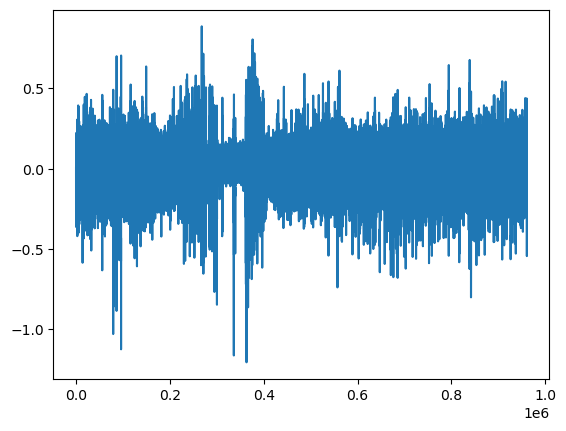

In [13]:
''' ecog '''

ele_rec_bs = pd.read_csv(load_path + "ecog_data_m009_iso2.csv")
ele_rec_bs = ele_rec_bs.values
ele_data = ele_rec_bs.T
print("ele_data:", type(ele_data), ele_data.shape)

ele_fp26 = ele_data[26 - 1]
print("ele_fp26:", len(ele_fp26))
plt.plot(ele_fp26)
plt.show()



# ecog figures

============== b_s_idx  0  =================
ele_start_row, ele_end_row: 229800 230899
ele_data_se: (32, 1099)


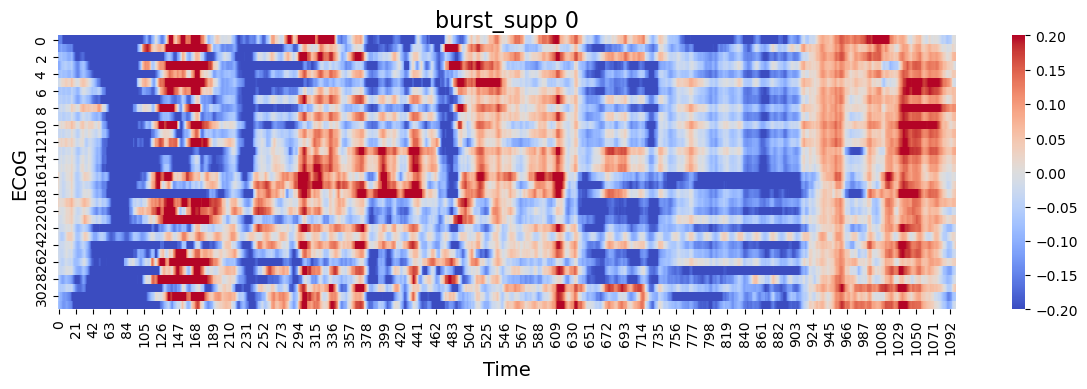

ele_data_se: (32, 1099)


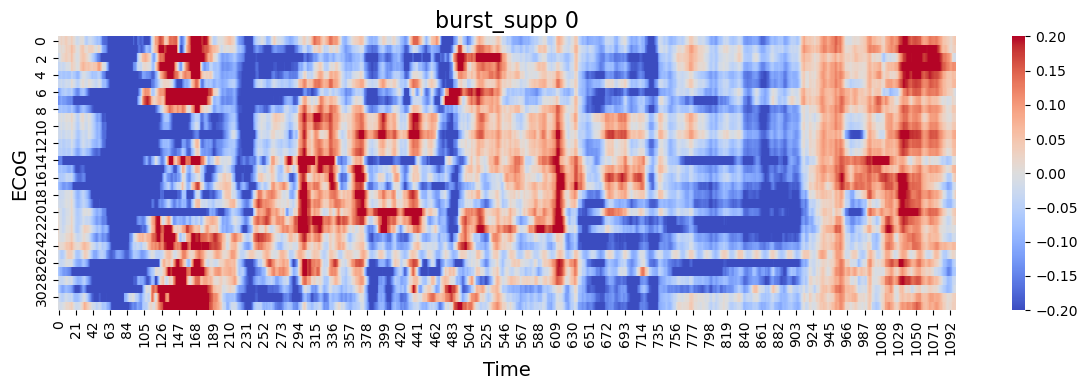

============== b_s_idx  1  =================
ele_start_row, ele_end_row: 231600 232800
ele_data_se: (32, 1200)


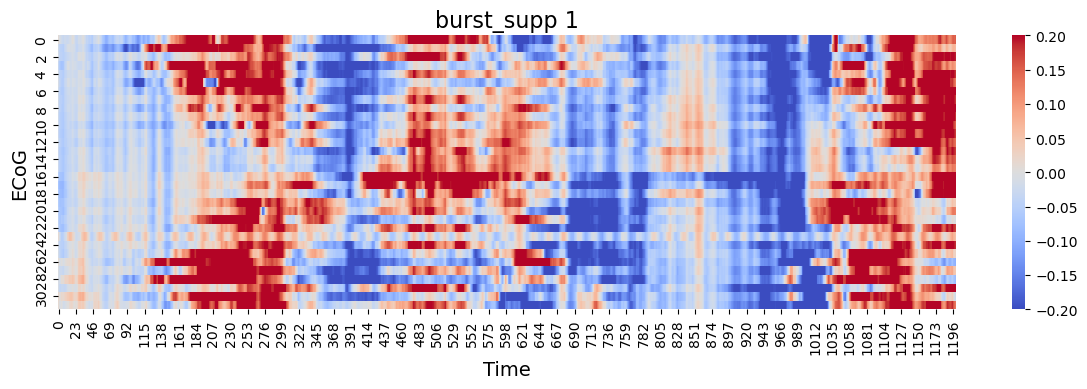

ele_data_se: (32, 1200)


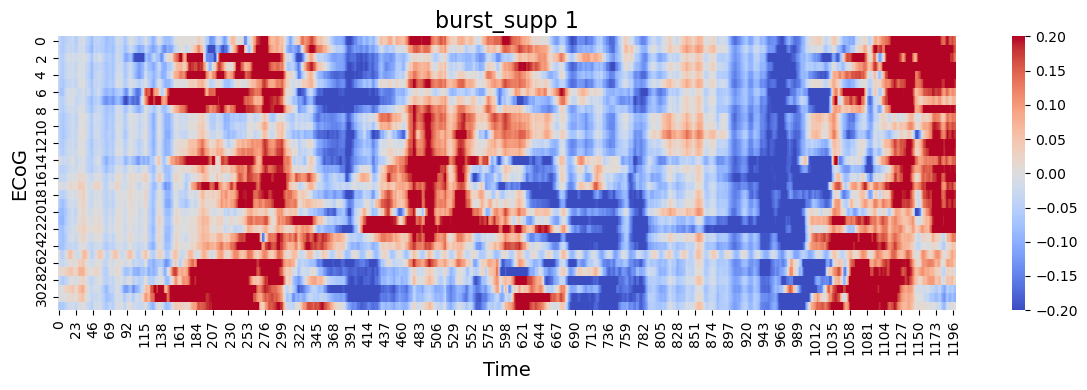

============== b_s_idx  2  =================
ele_start_row, ele_end_row: 235500 236800
ele_data_se: (32, 1300)


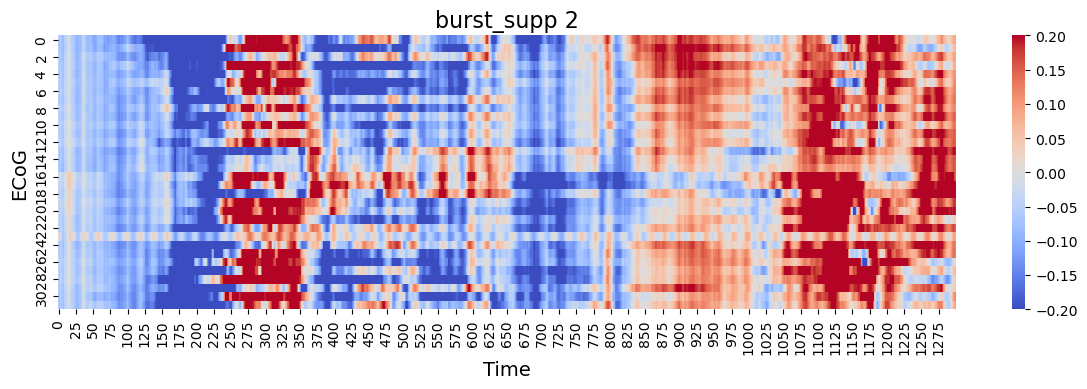

ele_data_se: (32, 1300)


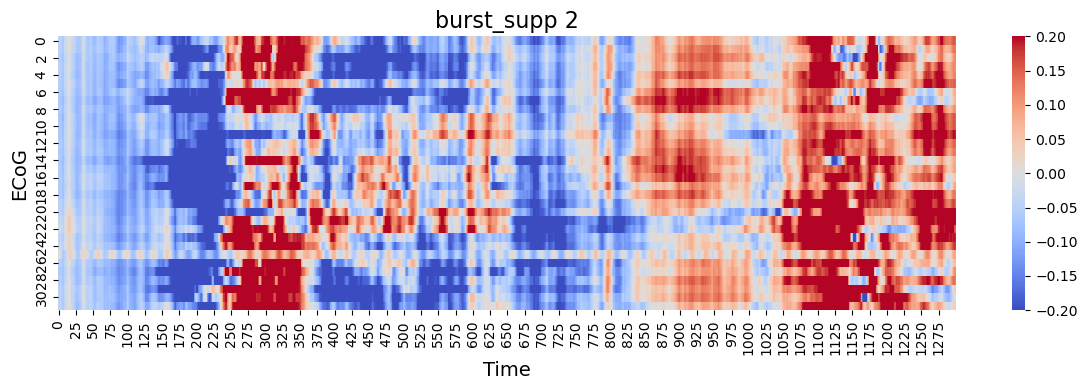

============== b_s_idx  3  =================
ele_start_row, ele_end_row: 237200 238200
ele_data_se: (32, 1000)


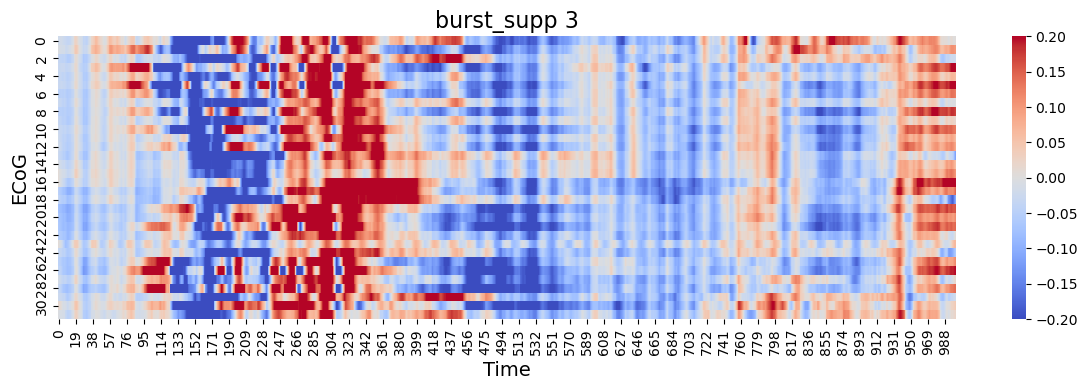

ele_data_se: (32, 1000)


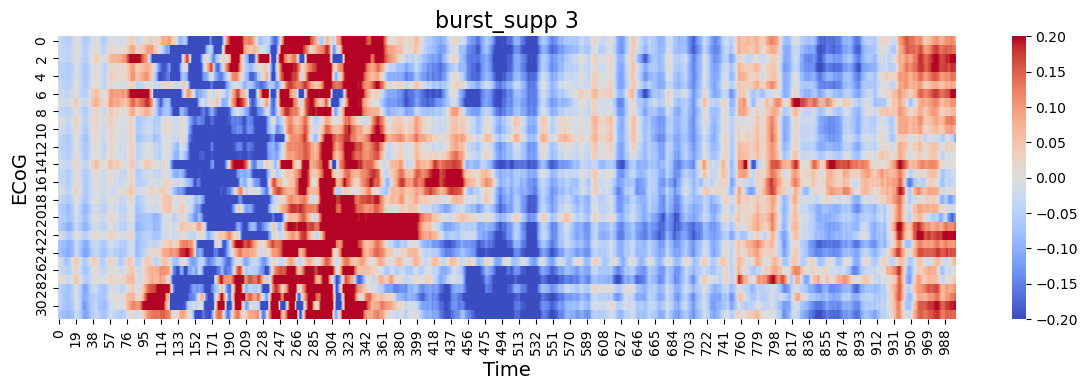

============== b_s_idx  4  =================
ele_start_row, ele_end_row: 238600 240200
ele_data_se: (32, 1600)


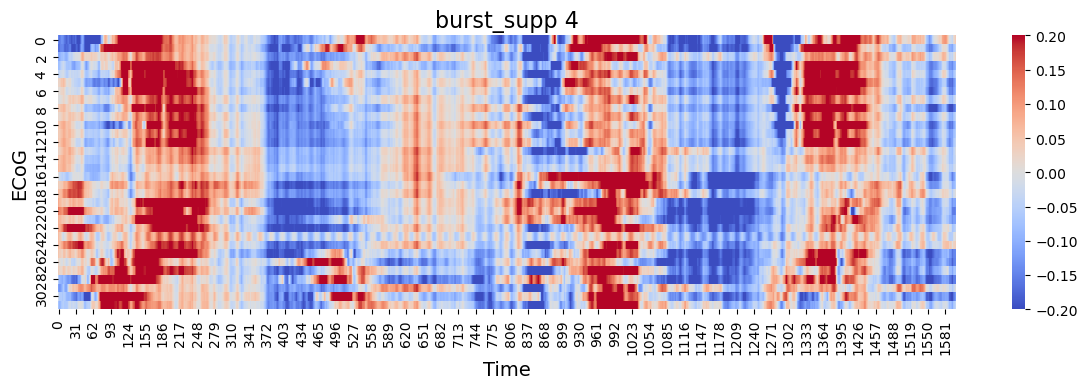

ele_data_se: (32, 1600)


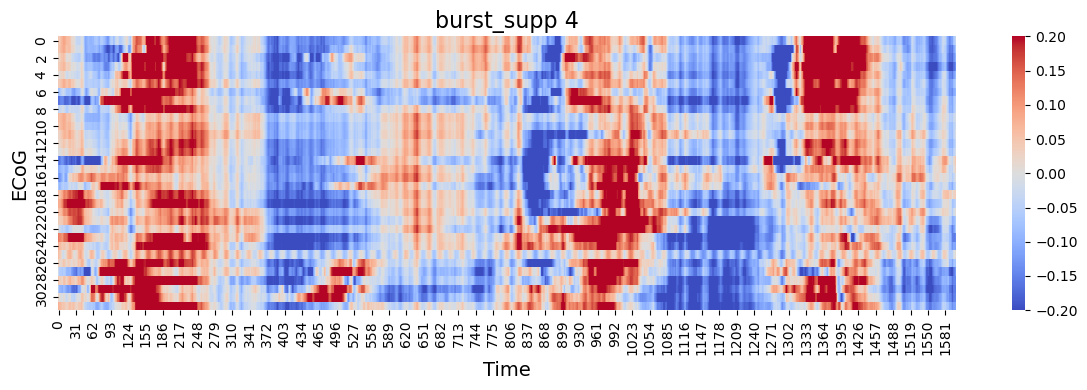

============== b_s_idx  5  =================
ele_start_row, ele_end_row: 240700 241300
ele_data_se: (32, 600)


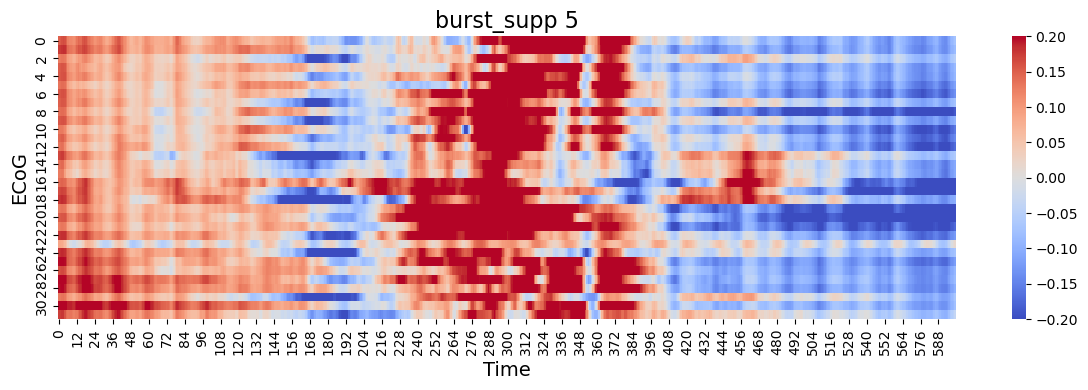

ele_data_se: (32, 600)


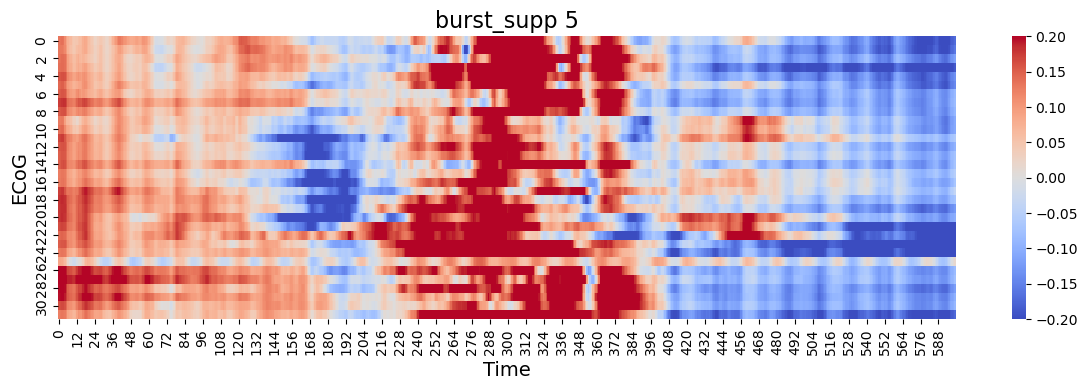

============== b_s_idx  6  =================
ele_start_row, ele_end_row: 241600 243899
ele_data_se: (32, 2299)


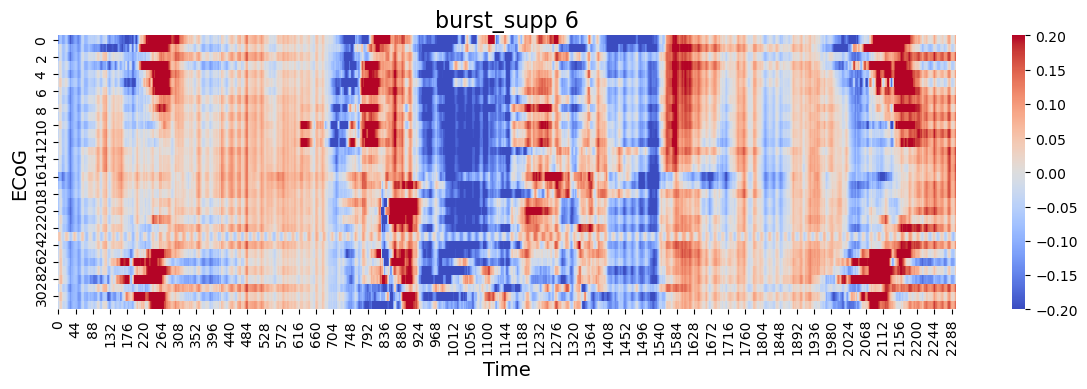

ele_data_se: (32, 2299)


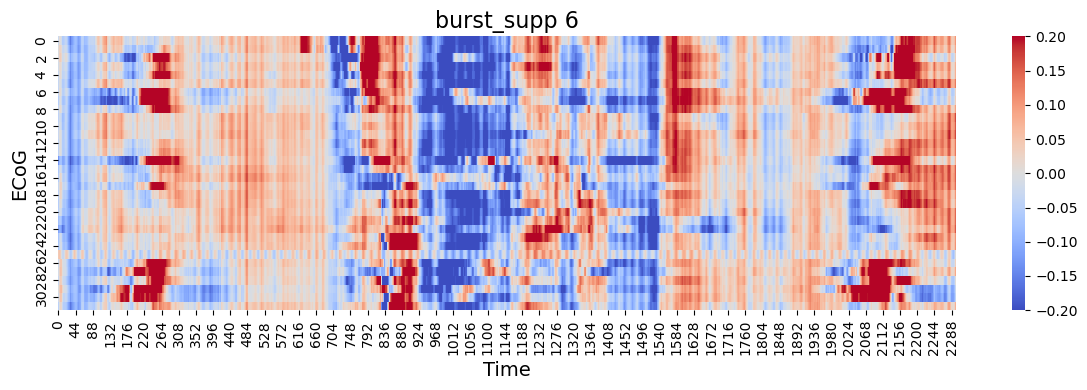

============== b_s_idx  7  =================
ele_start_row, ele_end_row: 246800 248700
ele_data_se: (32, 1900)


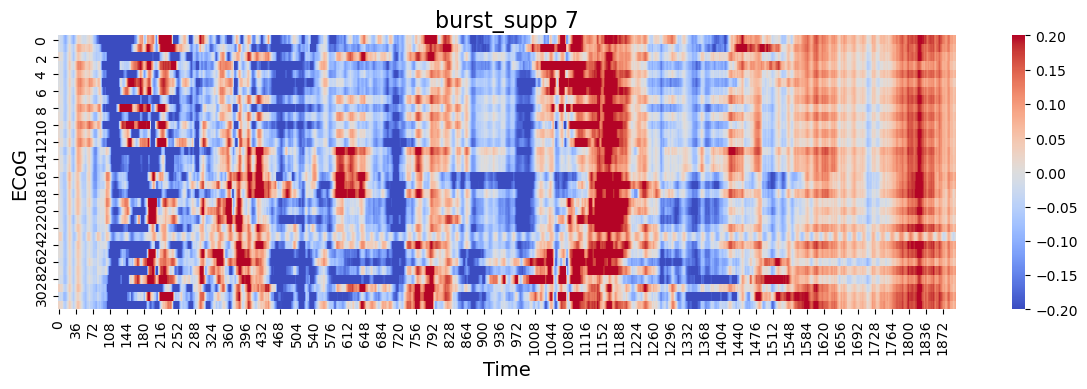

ele_data_se: (32, 1900)


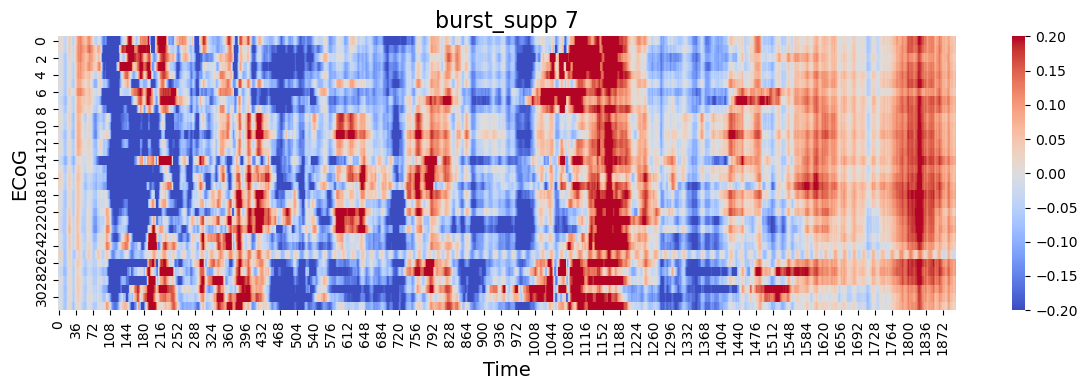

============== b_s_idx  8  =================
ele_start_row, ele_end_row: 251700 254000
ele_data_se: (32, 2300)


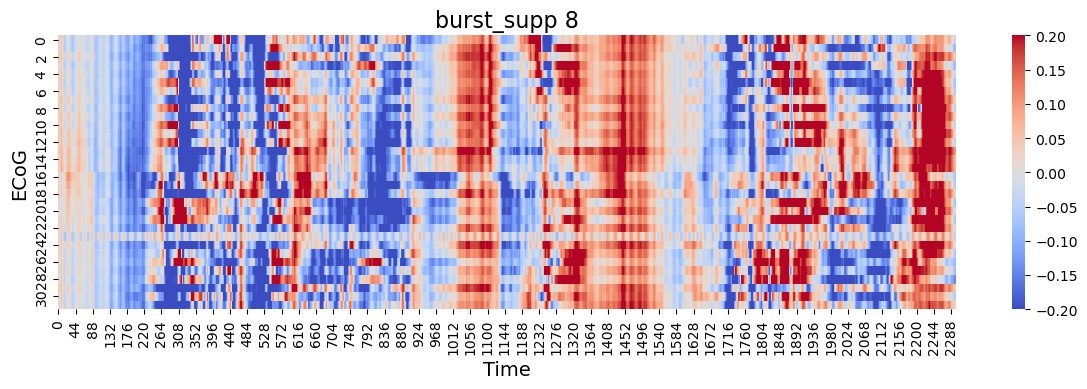

ele_data_se: (32, 2300)


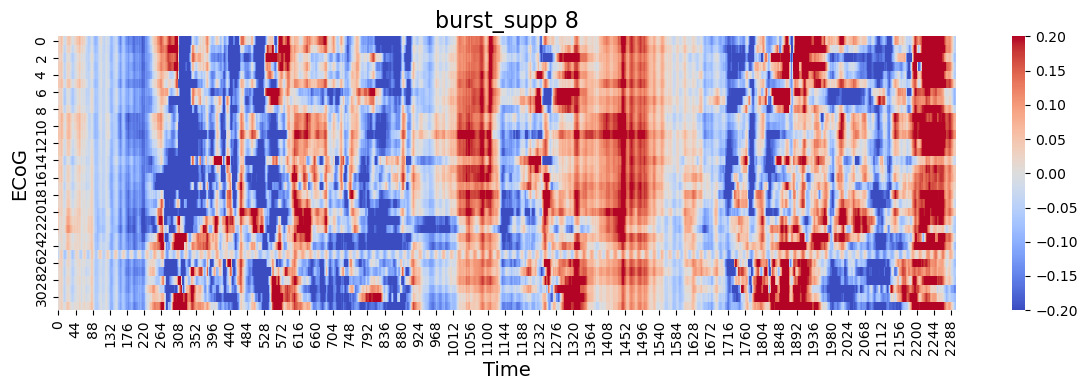

============== b_s_idx  9  =================
ele_start_row, ele_end_row: 254399 255399
ele_data_se: (32, 1000)


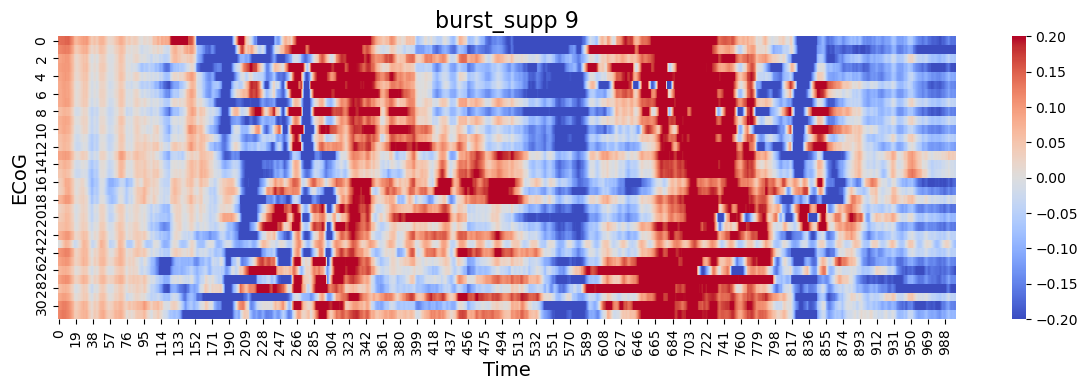

ele_data_se: (32, 1000)


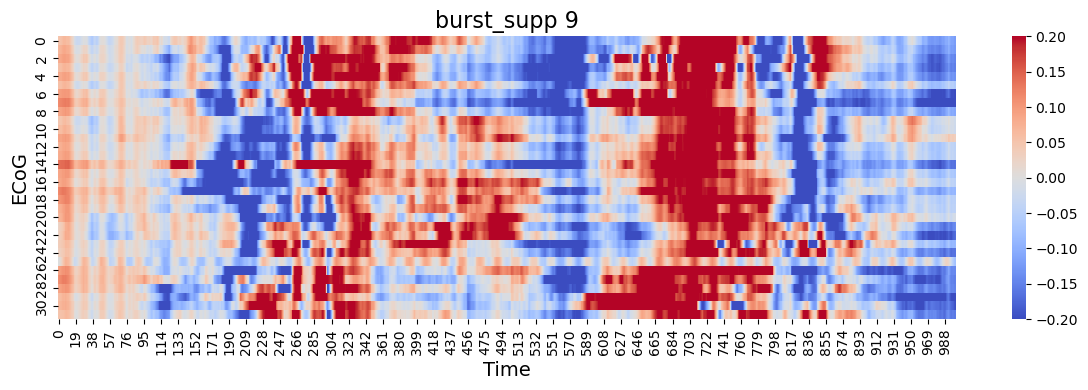

============== b_s_idx  10  =================
ele_start_row, ele_end_row: 257200 259200
ele_data_se: (32, 2000)


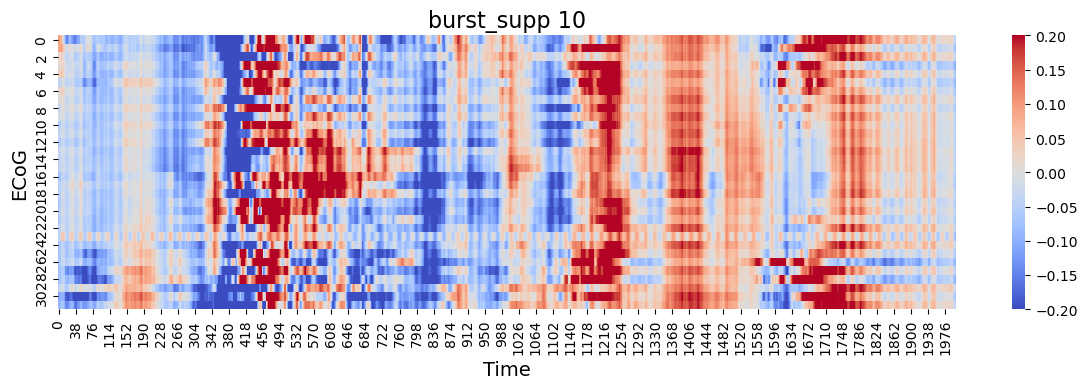

ele_data_se: (32, 2000)


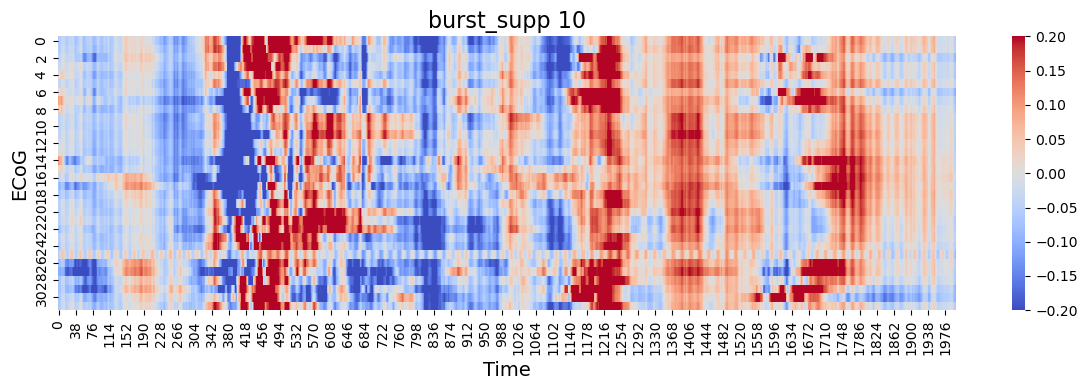

============== b_s_idx  11  =================
ele_start_row, ele_end_row: 261100 263100
ele_data_se: (32, 2000)


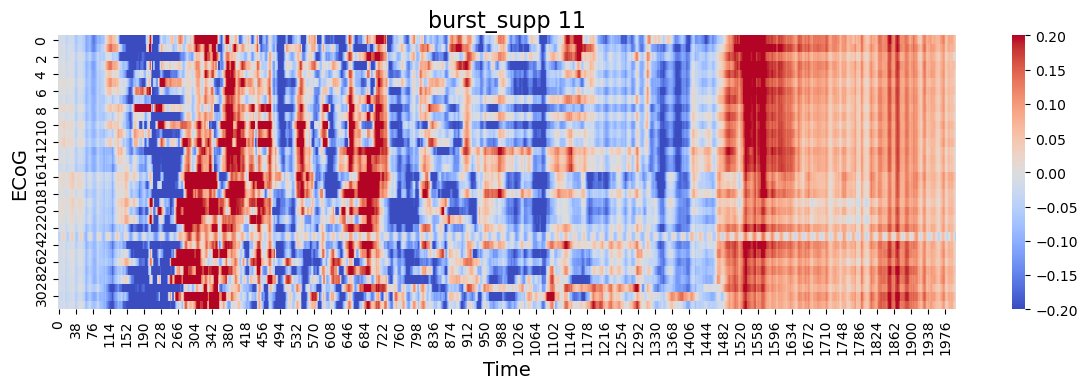

ele_data_se: (32, 2000)


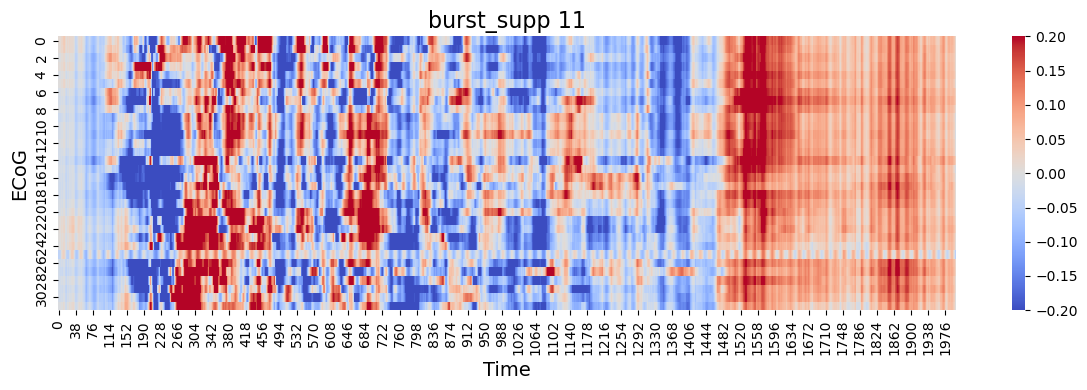

============== b_s_idx  12  =================
ele_start_row, ele_end_row: 266400 268700
ele_data_se: (32, 2300)


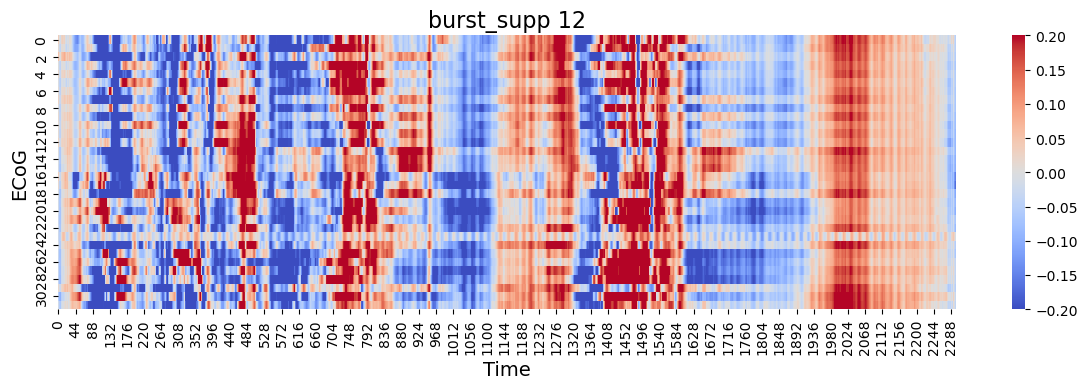

ele_data_se: (32, 2300)


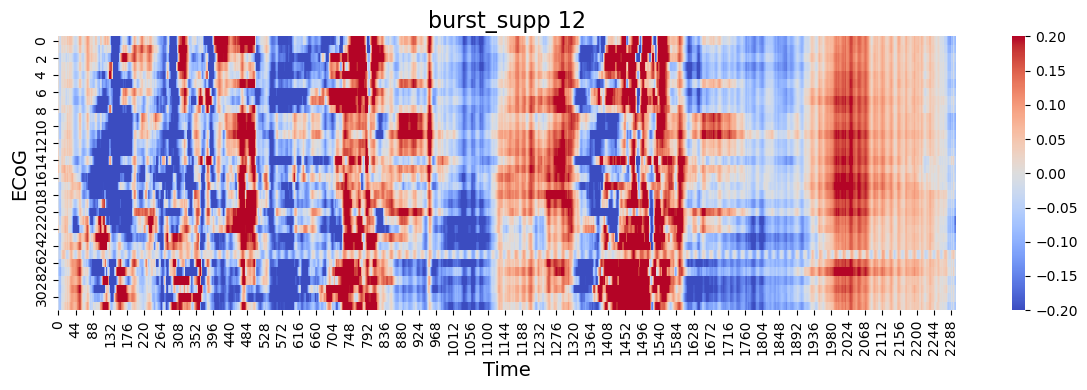

============== b_s_idx  13  =================
ele_start_row, ele_end_row: 270800 273000
ele_data_se: (32, 2200)


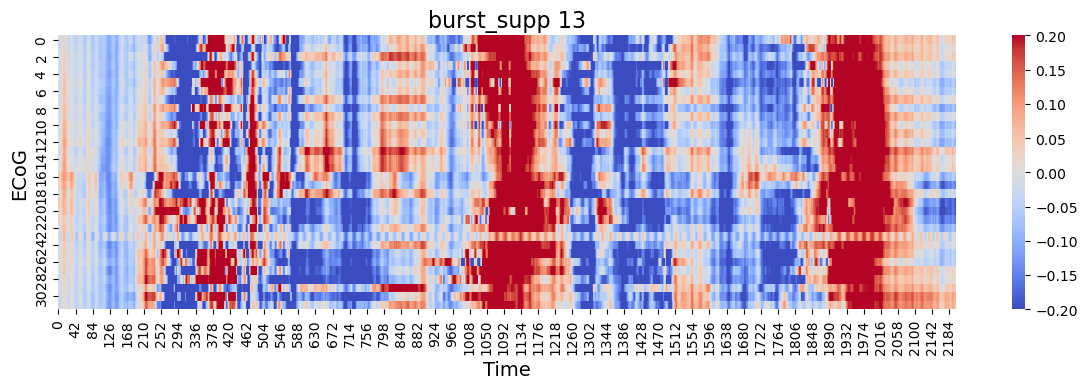

ele_data_se: (32, 2200)


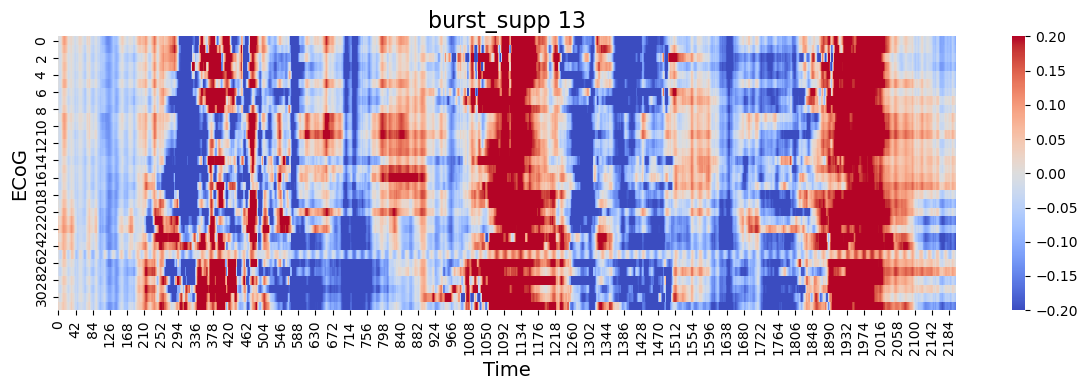

============== b_s_idx  14  =================
ele_start_row, ele_end_row: 276000 277500
ele_data_se: (32, 1500)


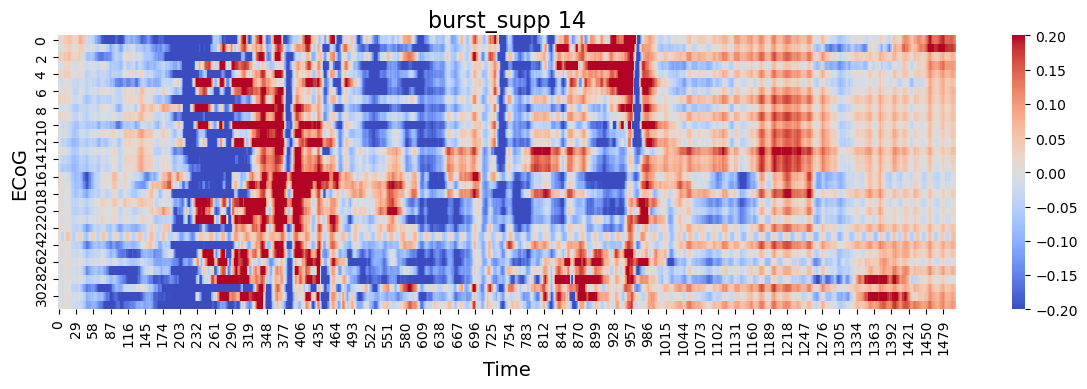

ele_data_se: (32, 1500)


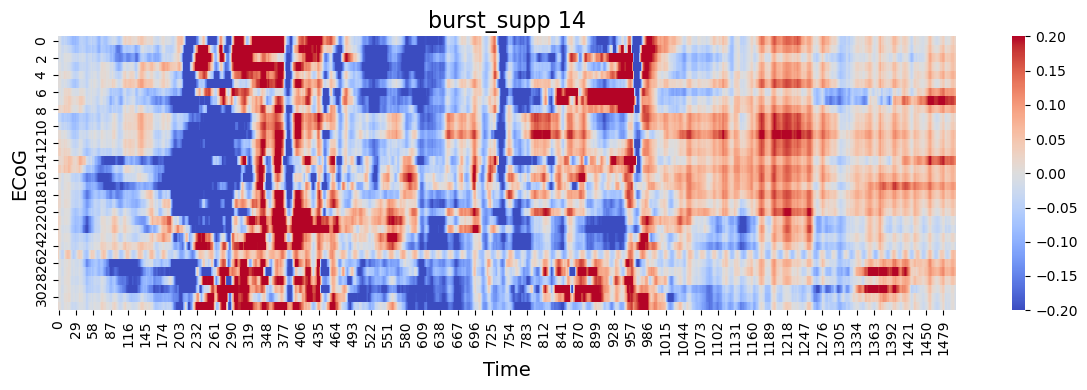

============== b_s_idx  15  =================
ele_start_row, ele_end_row: 279700 280100
ele_data_se: (32, 400)


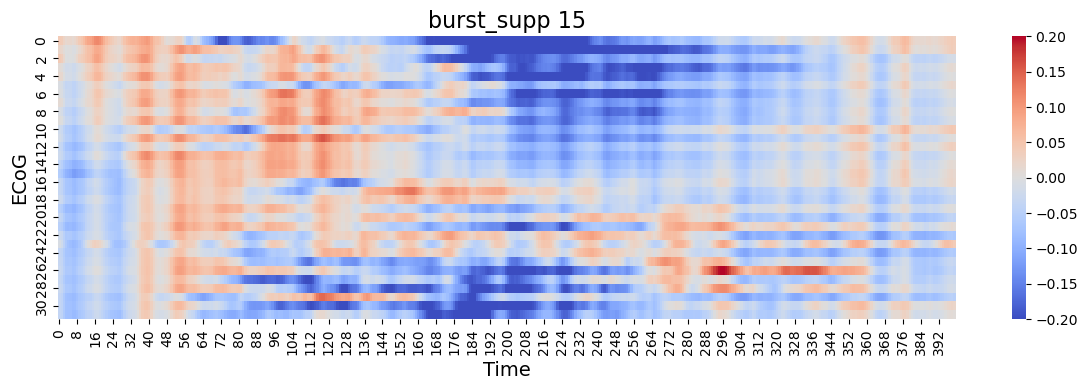

ele_data_se: (32, 400)


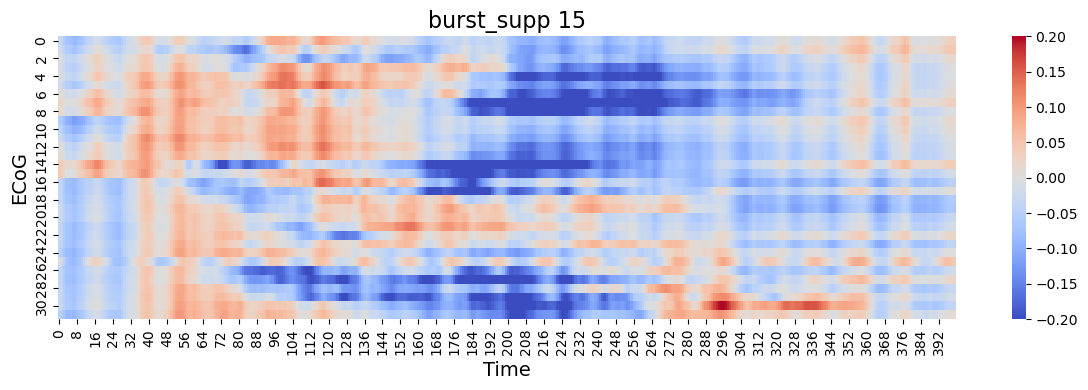

============== b_s_idx  16  =================
ele_start_row, ele_end_row: 280700 281600
ele_data_se: (32, 900)


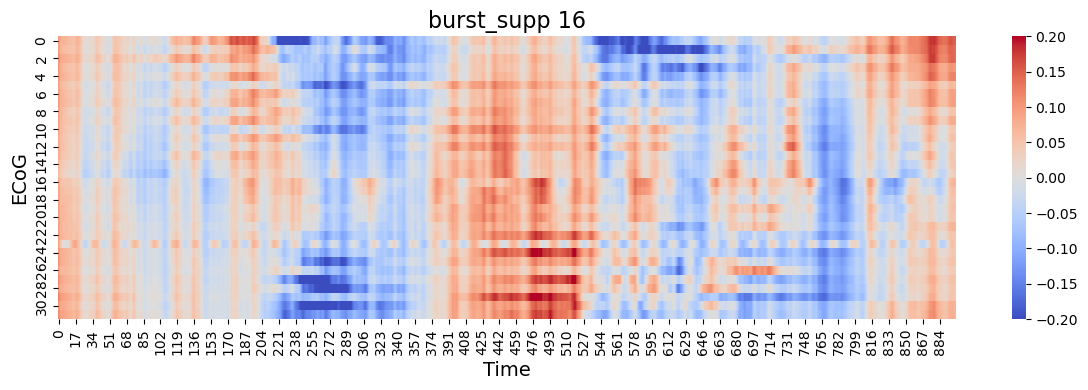

ele_data_se: (32, 900)


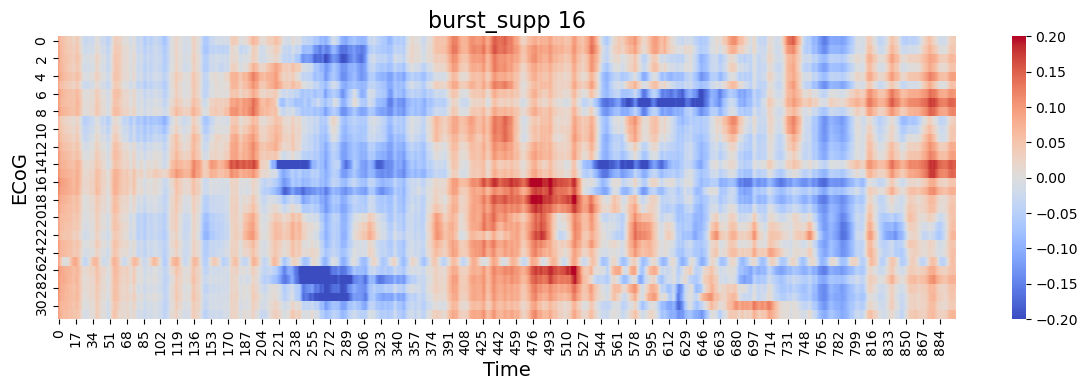

============== b_s_idx  17  =================
ele_start_row, ele_end_row: 284500 286600
ele_data_se: (32, 2100)


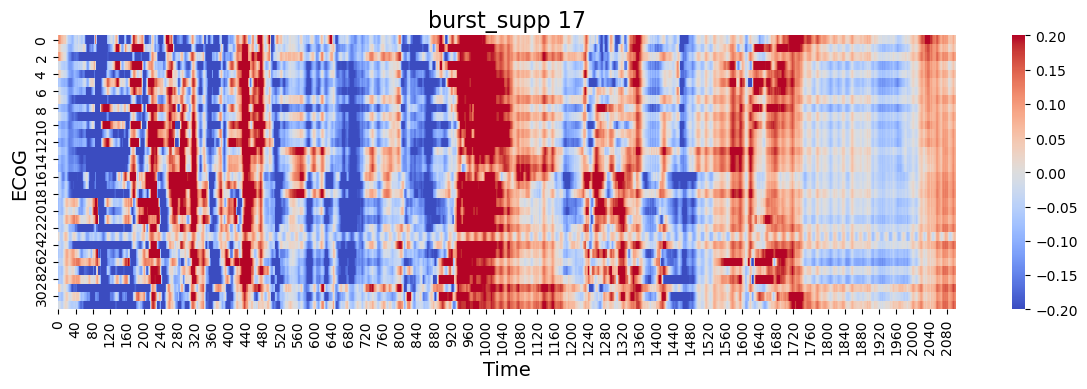

ele_data_se: (32, 2100)


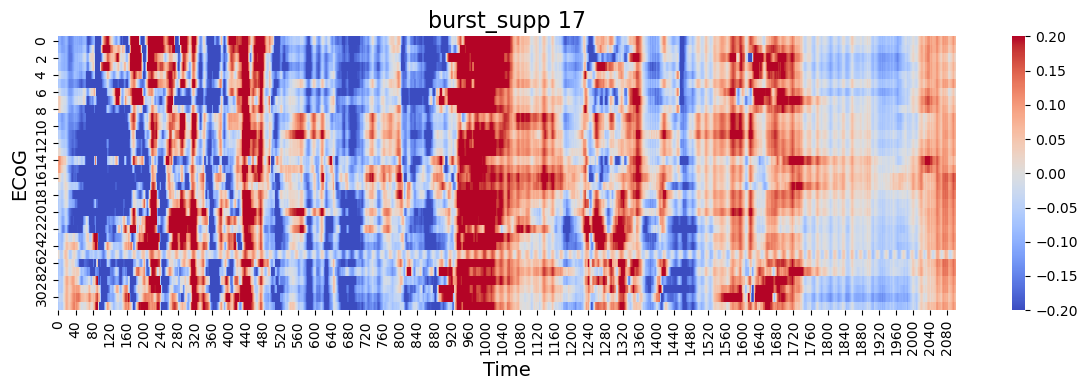

============== b_s_idx  18  =================
ele_start_row, ele_end_row: 289600 291300
ele_data_se: (32, 1700)


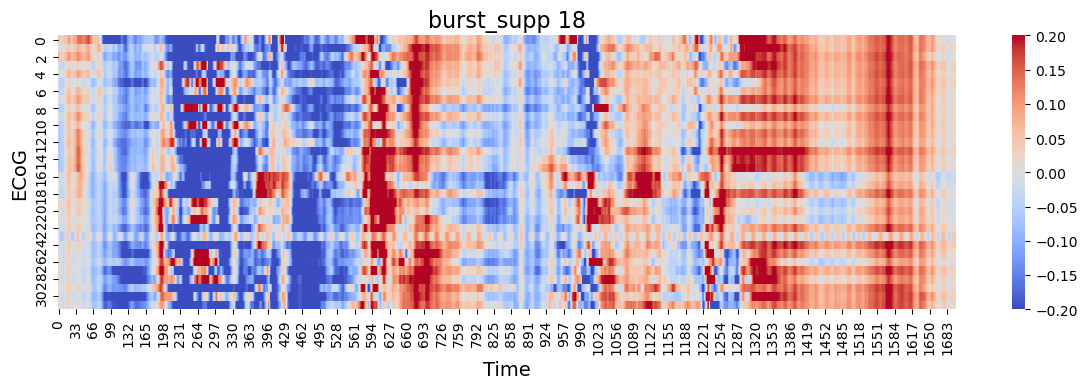

ele_data_se: (32, 1700)


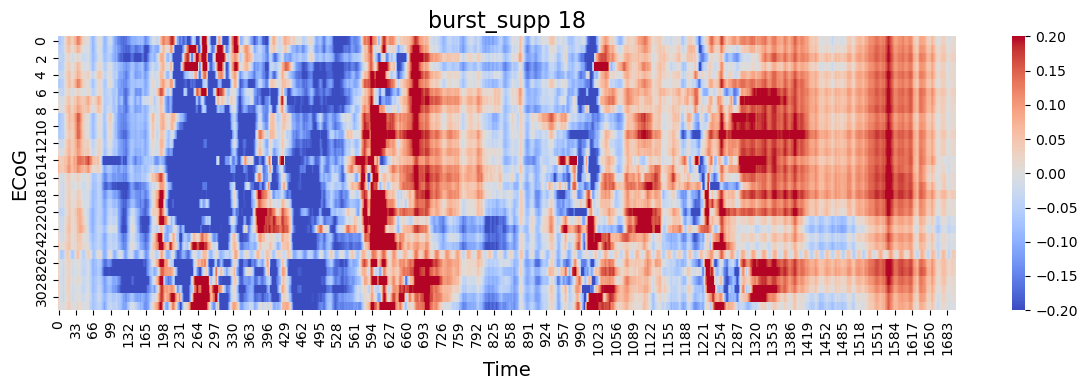

============== b_s_idx  19  =================
ele_start_row, ele_end_row: 294400 295600
ele_data_se: (32, 1200)


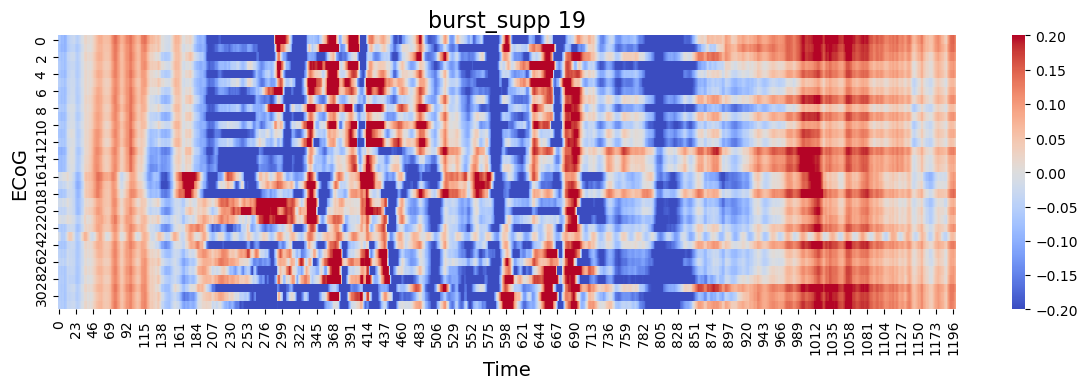

ele_data_se: (32, 1200)


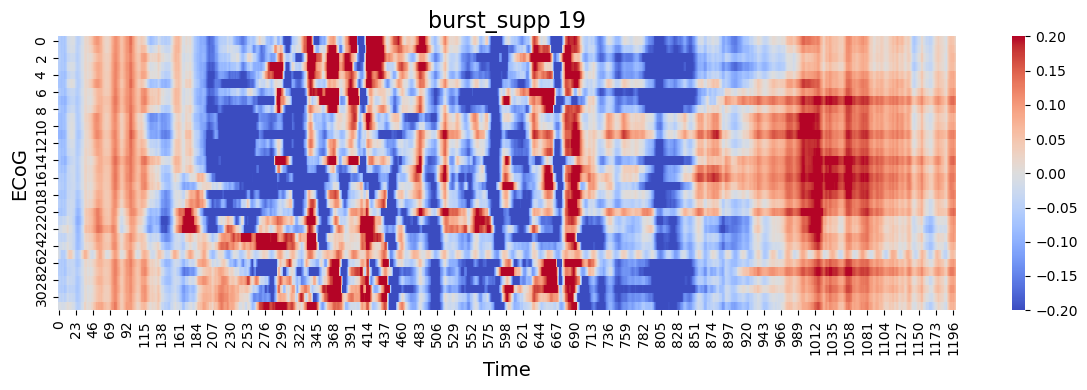

============== b_s_idx  20  =================
ele_start_row, ele_end_row: 299500 300900
ele_data_se: (32, 1400)


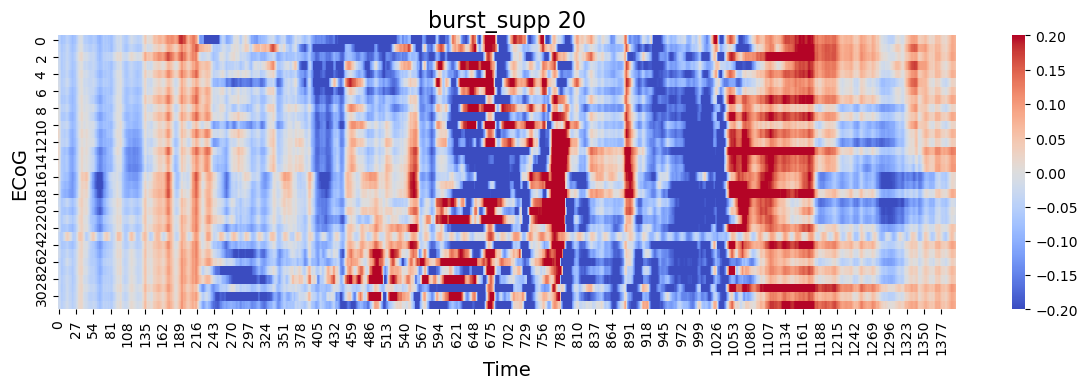

ele_data_se: (32, 1400)


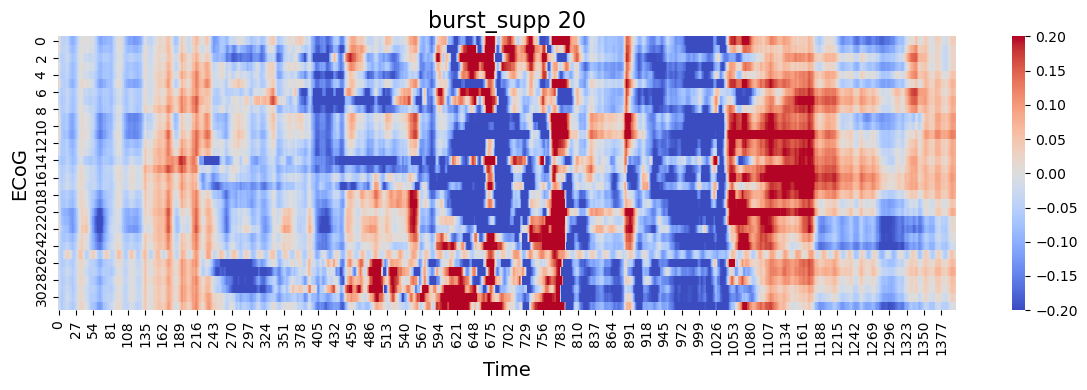

============== b_s_idx  21  =================
ele_start_row, ele_end_row: 305600 306200
ele_data_se: (32, 600)


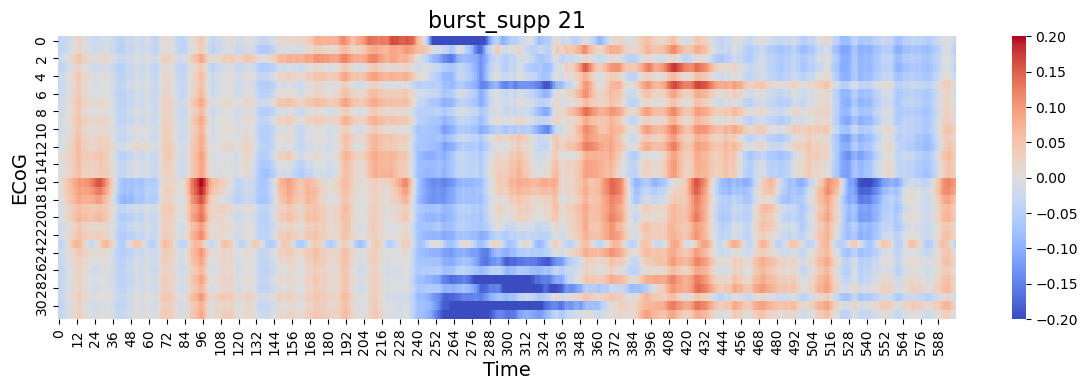

ele_data_se: (32, 600)


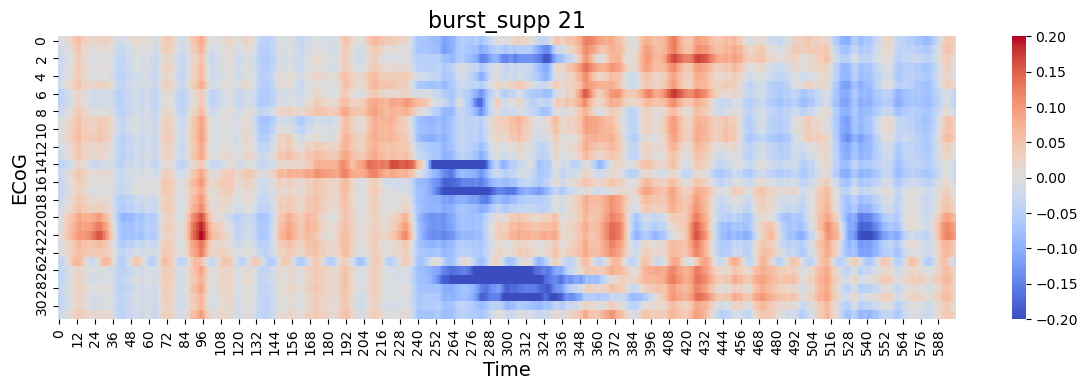

============== b_s_idx  22  =================
ele_start_row, ele_end_row: 307100 307700
ele_data_se: (32, 600)


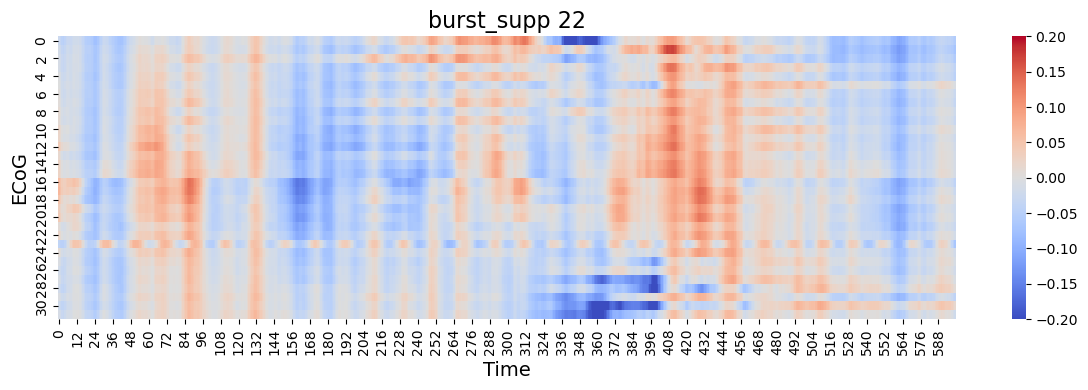

ele_data_se: (32, 600)


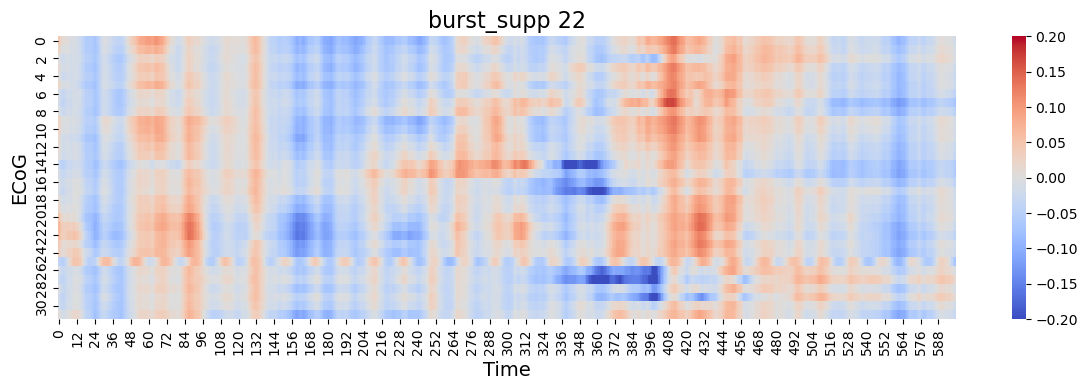

In [10]:
''' calc trace '''

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

# parameters
ecog_channel_sort = [13,11,6,9,7,12,4,2,5,16,15,14,10,8,1,3,30,32,25,23,19,18,17,21,20,24,28,31,26,29,27,22]



for b_s_idx in range(len(bs_start_idx)):
    print("============== b_s_idx ", b_s_idx, " =================")
    
    calc_start, calc_end = bs_start_idx[b_s_idx], bs_end_idx[b_s_idx]
    ele_start, ele_end = calc_start / 10 + 36.3, calc_end / 10 + 36.3
    ele_start_row, ele_end_row = int(ele_start * 1000), int(ele_end * 1000)
    print("ele_start_row, ele_end_row:", ele_start_row, ele_end_row)

    # ori order
    cols = [i for i in range(32)]
    ele_data_se = ele_data[cols, ele_start_row : ele_end_row]
    print("ele_data_se:", ele_data_se.shape)
    
    data = pd.DataFrame(ele_data_se) 
    plt.figure(figsize=(12,4), tight_layout = True)
    sns.heatmap(data, cmap = "coolwarm",  vmin = -0.2, vmax = 0.2)
    plt.title("burst_supp " + str(b_s_idx), fontsize = 16)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("ECoG", fontsize = 14)
#     plt.savefig(res_path + "multi_channels/eeg_32_channels_burst_index_" + str(b_s_idx) + ".png", bbox_inches='tight')
#     plt.savefig(res_path + "multi_channels/eeg_32_channels_burst_index_" + str(b_s_idx) + ".pdf", bbox_inches='tight')
    plt.show()

    # sorted
    cols = [i - 1 for i in ecog_channel_sort]
    ele_data_se = ele_data[cols, ele_start_row : ele_end_row]
    print("ele_data_se:", ele_data_se.shape)
    
    data = pd.DataFrame(ele_data_se) 
    plt.figure(figsize=(12,4), tight_layout = True)
    sns.heatmap(data, cmap = "coolwarm",  vmin = -0.2, vmax = 0.2)
    plt.title("burst_supp " + str(b_s_idx), fontsize = 16)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("ECoG", fontsize = 14)
    plt.savefig(res_path + "multi_channels/eeg_32_channels_burst_index_" + str(b_s_idx) + "_sort.png", bbox_inches='tight')
    plt.savefig(res_path + "multi_channels/eeg_32_channels_burst_index_" + str(b_s_idx) + "_sort.pdf", bbox_inches='tight')
    plt.show()
    

============== ratio  0.8  =================
avg_list: 16 std_list: 16


C:\Users\BBNC\AppData\Local\Temp\ipykernel_12760\2190113943.py:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,2,1)


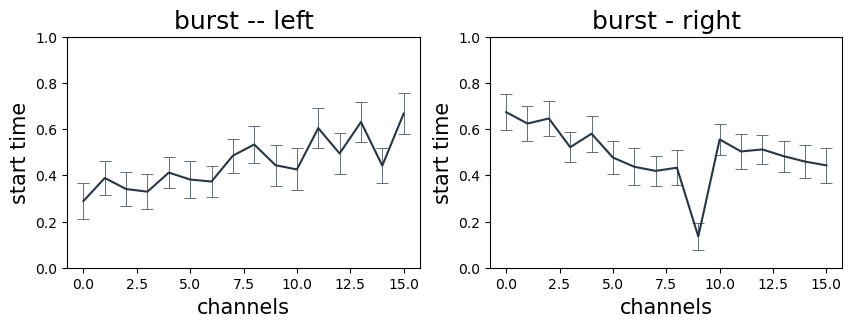

In [16]:
''' calc trace '''

def normalization(data):
    _range = np.max(data) - np.min(data)
    if np.max(data) == np.min(data):
        return [0.5] * len(data)
    else:
        return (data - np.min(data)) / _range

# paeameters
duration_cnt = 19
down_sampling = 10
p_thre = 0.05


ecog_channel_sort = [13,11,6,9,7,12,4,2,5,16,15,14,10,8,1,3,30,32,25,23,19,18,17,21,20,24,28,31,26,29,27,22]


ecog_data_all = []

for ratio in [0.8]:#[0.5,0.6,0.7,0.8,0.9]:
    print("============== ratio ", ratio, " =================")
    for b_s_idx in range(len(bs_start_idx)):
        
        calc_start, calc_end = bs_start_idx[b_s_idx], bs_end_idx[b_s_idx]
        ele_start, ele_end = calc_start / 10 + 36.3, calc_end / 10 + 36.3
        ele_start_row, ele_end_row = int(ele_start * 1000), int(ele_end * 1000)
    
        cols = [i - 1 for i in ecog_channel_sort]
        ele_data_se = ele_data[cols, ele_start_row : ele_end_row]

        start_idx = []
        for ele_single in ele_data_se:
            ele_sort = copy.deepcopy(ele_single)
            ele_sort.sort()
            ele_thre = ele_sort[int(len(ele_sort) * ratio)]
            ele_idx = [i for i in range(len(ele_single)) if ele_single[i] > ele_thre]
            start_idx.append(ele_idx[0])

        ecog_data_all.append(start_idx)

    # final figures
    fig, ax = plt.subplots(figsize = (10,3), dpi= 100,facecolor="w")
    
    ecog_data_all_norm = [normalization(i[:16]) for i in ecog_data_all]
    avg_list = np.mean(ecog_data_all_norm, axis = 0)
    std_list = [i/math.sqrt(19) for i in np.std(ecog_data_all_norm, axis = 0)]
    ax = plt.subplot(1,2,1)
    plt.errorbar(list(range(len(avg_list))),avg_list, yerr = std_list, fmt = '', 
                 ecolor = "#283747", elinewidth = 0.5, color = "#283747", capsize = 4, capthick = 0.5)
    plt.plot(range(len(avg_list)), avg_list, color = "#283747", linewidth = 0.5, alpha = 0.8)
    plt.title("burst -- left", fontsize = 18)
    plt.ylabel("start time", fontsize = 15)
    plt.xlabel("channels", fontsize = 15)
    plt.ylim(0,1)
    
    ecog_data_all_norm = [normalization(i[16:]) for i in ecog_data_all]
    avg_list = np.mean(ecog_data_all_norm, axis = 0)
    std_list = [i/math.sqrt(19) for i in np.std(ecog_data_all_norm, axis = 0)]
    print("avg_list:", len(avg_list), "std_list:", len(std_list))
    ax = plt.subplot(1,2,2)
    plt.errorbar(list(range(len(avg_list))),avg_list, yerr = std_list, fmt = '', 
                 ecolor = "#283747", elinewidth = 0.5, color = "#283747", capsize = 4, capthick = 0.5)
    plt.plot(range(len(avg_list)), avg_list, color = "#283747", linewidth = 0.5, alpha = 0.8)
    plt.title("burst - right", fontsize = 18)
    plt.ylabel("start time", fontsize = 15)
    plt.xlabel("channels", fontsize = 15)
    plt.ylim(0,1)
    plt.savefig(res_path + "multi_channels/ele_32 channels_start_time_radius_burst_all.png", bbox_inches='tight')
    plt.savefig(res_path + "multi_channels/ele_32 channels_start_time_radius_burst_all.pdf", bbox_inches='tight')
    plt.show()
